###  Thery Antoine, Toquebiau Maxime, Bosseary Alexis

# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
EPSILON = 1e-8 # small constant to avoid underflow or divide per 0
%matplotlib inline

# I - Linear multidimensional regression

## I a) - Loading the data

In [2]:
data = pd.read_csv('data/linear_multi.csv', header=None)
X, Y = data.values[:, :-1], data.values[:, -1]
Y = Y.reshape((Y.shape[0], 1))

In [3]:
print(X.shape)

(2000, 25)


## I b) - Problem definition

We can define our MSE cost function $J(\mathbf{\theta})$ as follows:
$$
J(\mathbf{X}, \mathbf{Y}; \mathbf{\theta}) = \frac{1}{2n} \sum_{i=1}^n (Y_i - \mathbf{X_i} \mathbf{\theta})^2
= \frac{1}{2 n} \| \mathbf{Y} - \mathbf{X} \mathbf{\theta} \|_2^2,
$$
with $\mathbf{Y} = [y_1 \cdots y_n]$, $\mathbf{X} = [\mathbf{x_1} \cdots \mathbf{x_n}]$,

$\mathbf{Y} \in \mathbb{R}^{n\times{1}}$ being the vector of labels, $\mathbf{X} \in \mathbb{R}^{n\times{p}}$ being the vector of features, $\mathbf{\theta} \in \mathbb{R}^{p\times{1}}$ being our parameters, and $n$ the number of samples.

Now we can calculate the gradient $\nabla_{\mathbf{\theta}} J$:
$$
\nabla_{\mathbf{\theta}} J(\mathbf{X}, \mathbf{Y})^T = - \frac{1}{n} \sum_{i=1}^n \mathbf{X_i}(Y_i - \mathbf{X_i}\mathbf{\theta})
$$
$$
\nabla_{\mathbf{\theta}} J(\mathbf{X}, \mathbf{Y}) = - \frac{1}{n} \mathbf{X}^T(\mathbf{Y} - \mathbf{X}\mathbf{\theta})
$$

It leads us to the gradient descend (GD) iterative algorithm:
$$
\mathbf{\theta}_{t+1} := \mathbf{\theta}_{t} - \eta_t \nabla_{\mathbf{\theta}} J(\mathbf{X}, \mathbf{Y})
$$

It is common to decay the learning rate linearly until iteration $\tau$:
$$
\eta_t = (1-\alpha)\eta_0 + \alpha \eta_\tau
$$
with $\alpha = \frac{t}{\tau}$, and usually here we are going to take $\tau \approx 200$ and $\eta_\tau = \frac{\eta_0}{100}$

And finally, our linear prediction $\mathbf{\hat{Y}}$ can be expressed as:
$$
\mathbf{\hat{Y}} = \mathbf{X}\mathbf{\theta}
$$

It is also common to add regularization to the loss.

MSE loss with L1 penalty term:
$$
J(\mathbf{X}, \mathbf{Y}; \mathbf{\theta})_{pen} = J(\mathbf{X}, \mathbf{Y}; \mathbf{\theta}) + \gamma \sum_{i=1}^n \mid\mathbf{\theta}_i\mid
$$
MSE loss with L2 penalty term:
$$
J(\mathbf{X}, \mathbf{Y}; \mathbf{\theta})_{pen} = J(\mathbf{X}, \mathbf{Y}; \mathbf{\theta}) + \gamma \sum_{i=1}^n \mathbf{\theta}_i^2
$$

- **You are asked, wherever there are TODO expressions, to change the default expression by the right one**
- **Most expressions you are asked to implement can be found in the introduction above**

In [4]:
class LinearRegressor():
    def __init__(self, X, Y, penalization=None):
        p = X.shape[1]
        self.theta = np.random.normal(0, 1, p).reshape((p, 1))
        self.grad_theta = None
        self.training_losses_history = []
        self.validation_losses_history = []
        self.X_tr, self.X_val, self.Y_tr, self.Y_val = self.split_train_validation(X, Y)
        self.penalization = penalization
        # Gamma here initialized to None, set to actual value in fit function
        self.gamma = None
        
    def split_train_validation(self, X, Y, test_size=0.25, seed=False):
        random_state = 42 if seed else np.random.randint(1e3)
        X_tr, X_val, Y_tr, Y_val = train_test_split(X, Y, test_size=test_size, random_state=random_state)
        return X_tr, X_val, Y_tr, Y_val
    
    # Must return the linear prediction given X
    def predict(self, X):
        # TODO: (done)
        # Compute Y_hat = X.theta
        y_hat = np.dot(X, self.theta)
        return y_hat
    
    # Must return the gradient, penalized or not, of the given loss
    def compute_grad(self, X, Y, loss='MSE'):
        """Least-squares gradient"""
        assert(X.shape[0] == Y.shape[0])
        n = X.shape[0]
        if loss == 'MSE':
            # Here define the gradient of the given MSE loss
            # TODO: (done)
            grad = -np.dot(X.T, Y - self.predict(X)) / n
            if self.penalization == 'l2':
                # Here add to your current gradient the gradient of the l2 penalization term
                # TODO: (done)
                grad += 2 * self.gamma * self.theta
            if self.penalization == 'l1':
                # Here add to your current gradient the gradient of the l1 penalization term
                # TODO: (done)
                grad += self.gamma * np.sign(self.theta)
        else:
            raise NotImplementedError
        return grad
    
    # Call the gradient computation function with the used loss and proceed to a gradient descent step
    # Use the parameter step as learning rate (êta_t in above gradient descent formula)
    def step_gradient_descent(self, step, X, Y):
        self.grad_theta = self.compute_grad(X, Y, loss='MSE')
        # TODO: (done)
        self.theta = self.theta - step * self.grad_theta
        
    # Must return the given loss, penalized or not, for Y_true and Y_pred as inputs
    def loss(self, Y_true, Y_pred, loss='MSE'):
        """Least-squares loss"""
        assert(Y_true.shape[0] == Y_pred.shape[0])
        n = Y_true.shape[0]
        if loss == 'MSE':
            # TODO: (done)
            loss = (np.linalg.norm(Y_true - Y_pred) ** 2) / (2 * n)
            if self.penalization == 'l2':
                # Reminder: l2 penalization is the sum of the square parameters
                # TODO: (done)
                loss += self.gamma * np.sum(self.theta ** 2)
            elif self.penalization == 'l1':
                # Reminder: l1 penalization is the sum of the absolute parameters
                # TODO: (done)
                loss += self.gamma * np.sum(np.abs(self.theta))
        else:
            raise NotImplementedError
        return loss
    
    def loss_history_flush(self):
        self.training_losses_history = []
        self.validation_losses_history = []
    
    # Step decay strategy, the idea is to have a step value that fluctuates with k until the tau value
    # Return the step value for iteration k
    def apply_step_decay(self, initial_step, k, tau=250):
        # Use formula in introduction
        # N.B.: êta_0 = initial_step
        # TODO: (done)
        alpha = k / tau
        new_step = (1 - alpha) * initial_step + alpha * (initial_step / 100)
        return new_step
        
    def fit(self, initial_step=1e-1, min_iterations=50, max_iterations=5000, gamma=1e-3, 
            early_stopping=True, early_stopping_delta=1e-3, early_stopping_lookbehind=50, 
            step_decay=True, flush_history=True, verbose=True):
        if flush_history:
            self.loss_history_flush()
        cpt_patience, best_validation_loss = 0, np.inf
        iteration_number = 0
        step = initial_step
        self.gamma = gamma
        while len(self.training_losses_history) < max_iterations:
            iteration_number += 1
            self.step_gradient_descent(step, self.X_tr, self.Y_tr)
            if step_decay:
                step = self.apply_step_decay(initial_step, iteration_number)
            training_loss = self.loss(self.Y_tr, self.predict(self.X_tr))
            self.training_losses_history.append(training_loss)
            validation_loss = self.loss(self.Y_val, self.predict(self.X_val))
            self.validation_losses_history.append(validation_loss)
            if iteration_number > min_iterations and early_stopping:
                if validation_loss + early_stopping_delta < best_validation_loss:
                    best_validation_loss = validation_loss
                    cpt_patience = 0
                else:
                    cpt_patience += 1
            if verbose:
                msg = "iteration number: {0}\t training loss: {1:.4f}\t validation loss: {2:.4f}"
                print(msg.format(iteration_number, training_loss, validation_loss))
            if cpt_patience >= early_stopping_lookbehind:
                break

    def plot_loss_history(self):
        plt.figure(figsize=(12, 8))
        if not np.any(linear_regressor.training_losses_history):
            return None
        plt.plot(range(len(self.training_losses_history)), 
                 self.training_losses_history, label='Training loss evolution')
        plt.plot(range(len(self.validation_losses_history)), 
                 self.validation_losses_history, label='Validation loss evolution')
        plt.legend(fontsize=15)
        plt.yscale('log')
        plt.xlabel("iteration number", fontsize=15)
        plt.ylabel("MSE loss", fontsize=15)
        if not self.penalization:
            title = "MSE loss evolution during training, no penalization"
        else:
            title = "MSE loss evolution during training, penalization {}"
            title = title.format(self.penalization)
        plt.title(title, fontsize=20)
        plt.show()
    
    def plot_parameters(self, title=None):
        plt.figure(figsize=(6, 4))
        plt.scatter(range(len(self.theta)), self.theta)
        plt.xlabel("parameter dimension", fontsize=15)
        plt.ylabel("value", fontsize=15)
        if title is None:
            if not self.penalization:
                plt.title("Scatter plot of the learned parameters, no penalization", fontsize=15)
            else:
                plt.title(
                    "Scatter plot of the learned parameters, penalization {}".format(self.penalization), fontsize=15
                )
        else:
                plt.title(title)
        plt.show()

In [5]:
linear_regressor = LinearRegressor(X, Y)
ridge_linear_regressor = LinearRegressor(X, Y, penalization='l2')
lasso_linear_regressor = LinearRegressor(X, Y, penalization='l1')

linear_regressor.fit(verbose=True)
ridge_linear_regressor.fit(gamma=1e-3, verbose=True, step_decay=True)
lasso_linear_regressor.fit(gamma=1e-3, verbose=True, step_decay=True)

iteration number: 1	 training loss: 8783.3886	 validation loss: 8766.2740
iteration number: 2	 training loss: 7048.1114	 validation loss: 7058.9509
iteration number: 3	 training loss: 5669.8564	 validation loss: 5698.1861
iteration number: 4	 training loss: 4573.2512	 validation loss: 4611.7355
iteration number: 5	 training loss: 3699.2185	 validation loss: 3742.7918
iteration number: 6	 training loss: 3001.3747	 validation loss: 3046.6096
iteration number: 7	 training loss: 2443.2410	 validation loss: 2487.8841
iteration number: 8	 training loss: 1996.0801	 validation loss: 2038.7116
iteration number: 9	 training loss: 1637.2156	 validation loss: 1677.0012
iteration number: 10	 training loss: 1348.7235	 validation loss: 1385.2341
iteration number: 11	 training loss: 1116.4126	 validation loss: 1149.4942
iteration number: 12	 training loss: 929.0287	 validation loss: 958.7086
iteration number: 13	 training loss: 777.6317	 validation loss: 804.0524
iteration number: 14	 training loss: 6

iteration number: 34	 training loss: 146.5389	 validation loss: 142.9337
iteration number: 35	 training loss: 144.2189	 validation loss: 140.3601
iteration number: 36	 training loss: 142.2722	 validation loss: 138.2130
iteration number: 37	 training loss: 140.6370	 validation loss: 136.4210
iteration number: 38	 training loss: 139.2617	 validation loss: 134.9247
iteration number: 39	 training loss: 138.1037	 validation loss: 133.6748
iteration number: 40	 training loss: 137.1276	 validation loss: 132.6306
iteration number: 41	 training loss: 136.3038	 validation loss: 131.7581
iteration number: 42	 training loss: 135.6077	 validation loss: 131.0291
iteration number: 43	 training loss: 135.0190	 validation loss: 130.4199
iteration number: 44	 training loss: 134.5204	 validation loss: 129.9110
iteration number: 45	 training loss: 134.0978	 validation loss: 129.4861
iteration number: 46	 training loss: 133.7391	 validation loss: 129.1314
iteration number: 47	 training loss: 133.4344	 vali

iteration number: 85	 training loss: 110.2299	 validation loss: 110.0824
iteration number: 86	 training loss: 110.2290	 validation loss: 110.0812
iteration number: 87	 training loss: 110.2282	 validation loss: 110.0800
iteration number: 88	 training loss: 110.2276	 validation loss: 110.0790
iteration number: 89	 training loss: 110.2270	 validation loss: 110.0781
iteration number: 90	 training loss: 110.2265	 validation loss: 110.0773
iteration number: 91	 training loss: 110.2260	 validation loss: 110.0766
iteration number: 92	 training loss: 110.2256	 validation loss: 110.0759
iteration number: 93	 training loss: 110.2252	 validation loss: 110.0753
iteration number: 94	 training loss: 110.2249	 validation loss: 110.0748
iteration number: 95	 training loss: 110.2246	 validation loss: 110.0743
iteration number: 96	 training loss: 110.2244	 validation loss: 110.0738
iteration number: 97	 training loss: 110.2242	 validation loss: 110.0734
iteration number: 98	 training loss: 110.2240	 vali

/home/antoine/.local/lib/python3.6/site-packages/matplotlib/mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


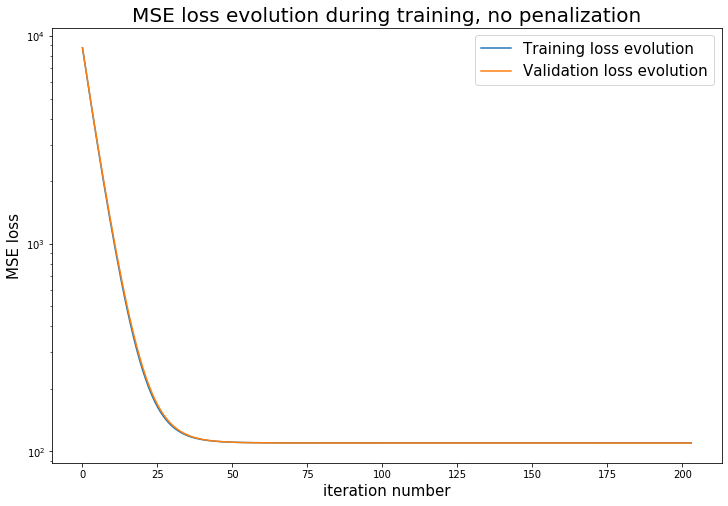

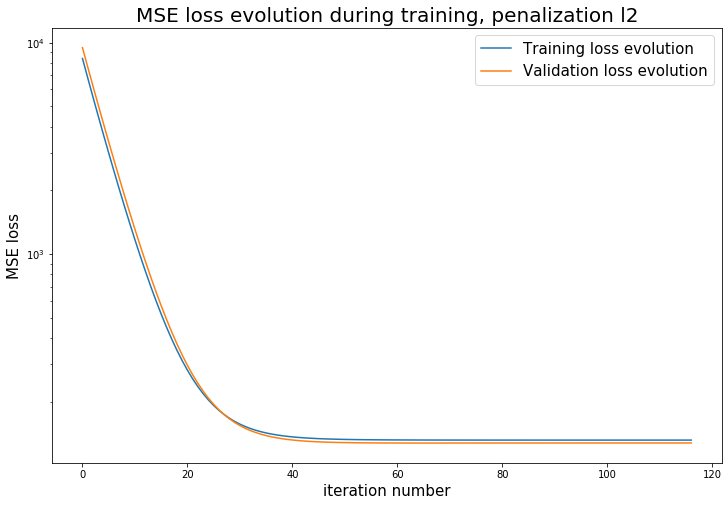

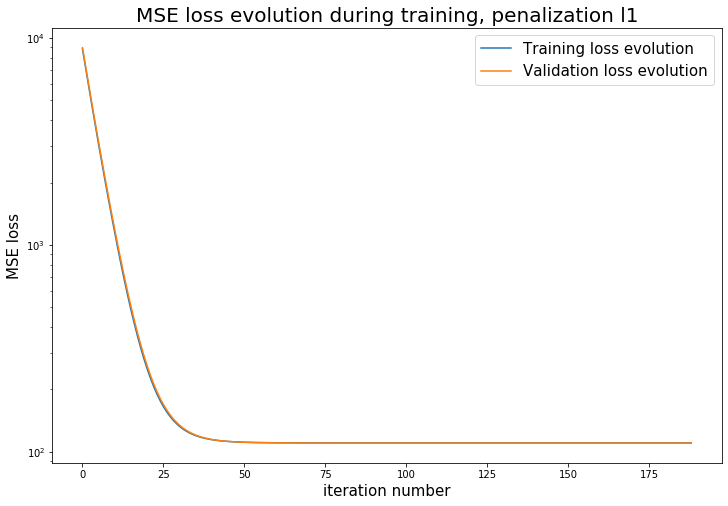

In [6]:
linear_regressor.plot_loss_history()
ridge_linear_regressor.plot_loss_history()
lasso_linear_regressor.plot_loss_history()

In [7]:
ridge_linear_regressor = LinearRegressor(X, Y, penalization='l2')
lasso_linear_regressor = LinearRegressor(X, Y, penalization='l1')

ridge_linear_regressor.fit(gamma=1e-2, verbose=True, step_decay=True)
lasso_linear_regressor.fit(gamma=1e-2, verbose=True, step_decay=True)


iteration number: 1	 training loss: 8797.9288	 validation loss: 9302.9714
iteration number: 2	 training loss: 7102.4669	 validation loss: 7522.5243
iteration number: 3	 training loss: 5754.7240	 validation loss: 6104.3428
iteration number: 4	 training loss: 4681.6549	 validation loss: 4972.9248
iteration number: 5	 training loss: 3825.9015	 validation loss: 4068.8601
iteration number: 6	 training loss: 3142.3543	 validation loss: 3345.3285
iteration number: 7	 training loss: 2595.4820	 validation loss: 2765.3747
iteration number: 8	 training loss: 2157.2550	 validation loss: 2299.7850
iteration number: 9	 training loss: 1805.5272	 validation loss: 1925.4303
iteration number: 10	 training loss: 1522.7744	 validation loss: 1623.9706
iteration number: 11	 training loss: 1295.1086	 validation loss: 1380.8416
iteration number: 12	 training loss: 1111.5066	 validation loss: 1184.4597
iteration number: 13	 training loss: 963.2057	 validation loss: 1025.5980
iteration number: 14	 training loss

iteration number: 29	 training loss: 147.0898	 validation loss: 173.1581
iteration number: 30	 training loss: 141.2150	 validation loss: 165.6004
iteration number: 31	 training loss: 136.3041	 validation loss: 159.2299
iteration number: 32	 training loss: 132.1933	 validation loss: 153.8511
iteration number: 33	 training loss: 128.7473	 validation loss: 149.3022
iteration number: 34	 training loss: 125.8547	 validation loss: 145.4487
iteration number: 35	 training loss: 123.4234	 validation loss: 142.1789
iteration number: 36	 training loss: 121.3776	 validation loss: 139.4001
iteration number: 37	 training loss: 119.6534	 validation loss: 137.0344
iteration number: 38	 training loss: 118.1984	 validation loss: 135.0171
iteration number: 39	 training loss: 116.9689	 validation loss: 133.2939
iteration number: 40	 training loss: 115.9287	 validation loss: 131.8195
iteration number: 41	 training loss: 115.0475	 validation loss: 130.5559
iteration number: 42	 training loss: 114.3000	 vali

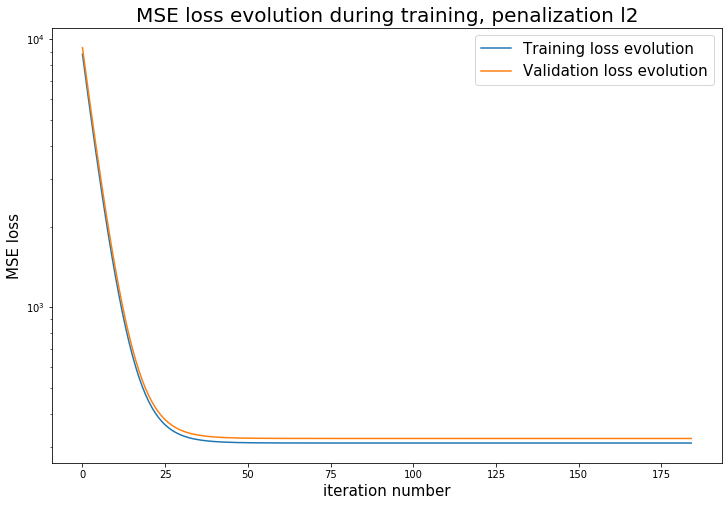

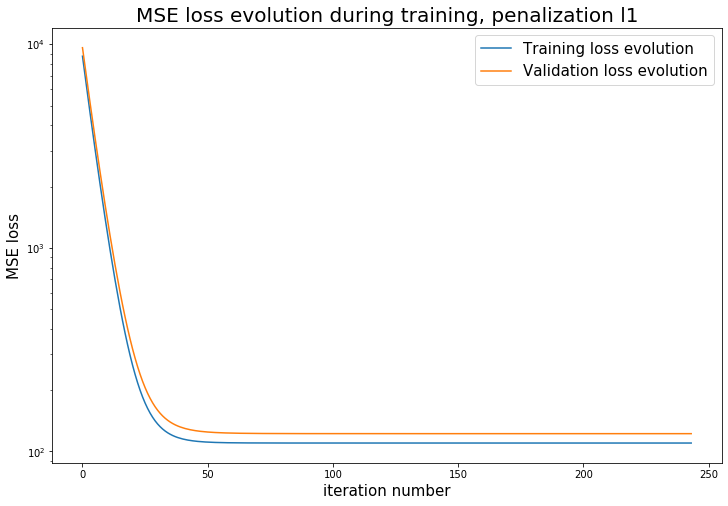

In [8]:

ridge_linear_regressor.plot_loss_history()
lasso_linear_regressor.plot_loss_history()

## Questions:
#### - What are l1 and l2 penalization strategies useful for? Did you achieve to improve your model's performance with them? Try different penalization values.
L1 (Lasso) and l2 (Ridge) penalization strategies are useful to prevent overfitting. L1 tends to encourage model parameters to go towards 0 while L2 only enforces that these take a small values.

With a gamma parameter set to 1e-3, we get worse results than without penalization. We can conclude that the gamma factor is a hyperparameter that needs to be carefully selected

However, when we take lower values of gamma, we manage to achieve the same results or improve the model's performance (depending on the random initialization), and to reduce the gap between training and validation loss. This means that the model generalizes better.
#### - Consider the parameters plot. What could you conclude about the features information?
Considering the parameters plot below, we can see that a majority of the parameters have a very low or nearly zero. Thus we could use this to do some feature engineering and select only the features that are relevant to our model for making predictions.

If we had done some sort of dimensionality reduction, we would have noticed the same thing when looking at our principal components in that the majority of the variance in the data is explained by only a very small number of features. Here looking at the graph bellow we see that only 5 features are highly relevant while the others are nearly useless. Of course if we chose to remove these features our prediction speed would greatly increase and our prediction accuracy would go down a little bit but not too much. 

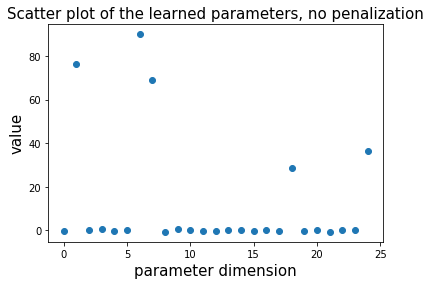

In [9]:
linear_regressor.plot_parameters()

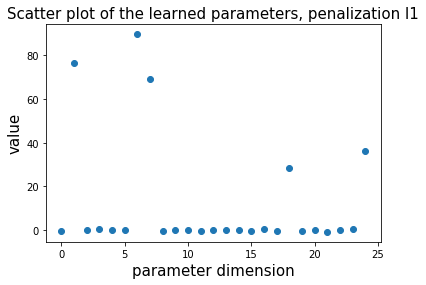

In [10]:
lasso_linear_regressor.plot_parameters()

# II - Non linear unidimensional regression

## II a) - Loading the data

In [11]:
data = pd.read_csv('data/non_linear.csv', header=None)
X_2, Y_2 = data.values[:, :-1], data.values[:, -1]
X_2, Y_2 = X_2.reshape((Y_2.shape[0], 1)), Y_2.reshape((Y_2.shape[0], 1))

## II b) - Visualizing the data

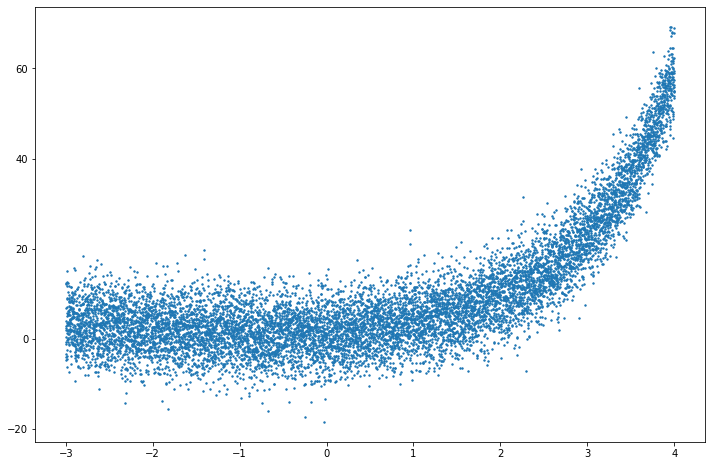

In [12]:
plt.figure(figsize=(12, 8))
plt.scatter(X_2, Y_2, s=2)
plt.show()

- Notice the relation between $X$ and $Y$ is non linear
- You are supposed to map X to a new non linear representation more suited to the type of dependance between $X$ and $y$
- Using this new representation of $X$ use the linear regressor properties from the beginning to perform predictions

In [13]:
class PolynomialRegressor(LinearRegressor):
    def __init__(self, X, Y, degree=2, penalization=None):
        self.degree = degree
        self.initial_X_tr, self.initial_X_val, _, _ = self.split_train_validation(X, Y)
        X_transformed = self.non_linear_mapping(X)
        super(PolynomialRegressor, self).__init__(X_transformed, Y, penalization)
        
    def split_train_validation(self, X, Y, test_size=0.25, seed=True):
        random_state = 42 if seed else np.random.randint(1e3)
        X_tr, X_val, Y_tr, Y_val = train_test_split(X, Y, test_size=test_size, random_state=random_state)
        return X_tr, X_val, Y_tr, Y_val

    # Must return a new features matrix based on a polynomial transformation
    def non_linear_mapping(self, X):
        # TODO: (done)
        # Here do the mapping 
        # We add a column of to have a bias
        new_X = np.hstack(tuple([X ** i for i in range(self.degree + 1)]))
        return new_X
    
    def predict(self, X, apply_features_transformation=False):
        if apply_features_transformation:
            X_transformed = self.non_linear_mapping(X)
            return super(PolynomialRegressor, self).predict(X_transformed)
        else:
            return super(PolynomialRegressor, self).predict(X)
        
    def plot_prediction(self):
        assert self.initial_X_val.shape[1] == 1, "Too high dimensional design matrix to be plotted!"
        plt.figure(figsize=(12, 8))
        plt.scatter(self.initial_X_val, self.Y_val, s=5)
        plt.scatter(
            self.initial_X_val, self.predict(self.initial_X_val, apply_features_transformation=True), 
            color='red', s=5
        )
        plt.title("Prediction with polynomial regressor, degree={}".format(self.degree), fontsize=15)
        plt.show()

In [14]:
polynomial_regressor = PolynomialRegressor(X_2, Y_2, degree=3)
polynomial_regressor.fit(initial_step=1e-3, max_iterations=500, verbose=True)

iteration number: 1	 training loss: 287.6290	 validation loss: 301.6590
iteration number: 2	 training loss: 170.7991	 validation loss: 179.3444
iteration number: 3	 training loss: 126.2835	 validation loss: 132.1258
iteration number: 4	 training loss: 108.0104	 validation loss: 112.4357
iteration number: 5	 training loss: 99.3620	 validation loss: 103.0038
iteration number: 6	 training loss: 94.3110	 validation loss: 97.4992
iteration number: 7	 training loss: 90.6578	 validation loss: 93.5722
iteration number: 8	 training loss: 87.5934	 validation loss: 90.3354
iteration number: 9	 training loss: 84.8169	 validation loss: 87.4451
iteration number: 10	 training loss: 82.2137	 validation loss: 84.7625
iteration number: 11	 training loss: 79.7386	 validation loss: 82.2284
iteration number: 12	 training loss: 77.3717	 validation loss: 79.8147
iteration number: 13	 training loss: 75.1031	 validation loss: 77.5067
iteration number: 14	 training loss: 72.9265	 validation loss: 75.2951
iterat

iteration number: 190	 training loss: 15.4165	 validation loss: 15.6993
iteration number: 191	 training loss: 15.4066	 validation loss: 15.6873
iteration number: 192	 training loss: 15.3969	 validation loss: 15.6756
iteration number: 193	 training loss: 15.3874	 validation loss: 15.6642
iteration number: 194	 training loss: 15.3782	 validation loss: 15.6531
iteration number: 195	 training loss: 15.3692	 validation loss: 15.6422
iteration number: 196	 training loss: 15.3604	 validation loss: 15.6316
iteration number: 197	 training loss: 15.3519	 validation loss: 15.6213
iteration number: 198	 training loss: 15.3436	 validation loss: 15.6112
iteration number: 199	 training loss: 15.3355	 validation loss: 15.6014
iteration number: 200	 training loss: 15.3276	 validation loss: 15.5919
iteration number: 201	 training loss: 15.3199	 validation loss: 15.5826
iteration number: 202	 training loss: 15.3125	 validation loss: 15.5735
iteration number: 203	 training loss: 15.3052	 validation loss: 

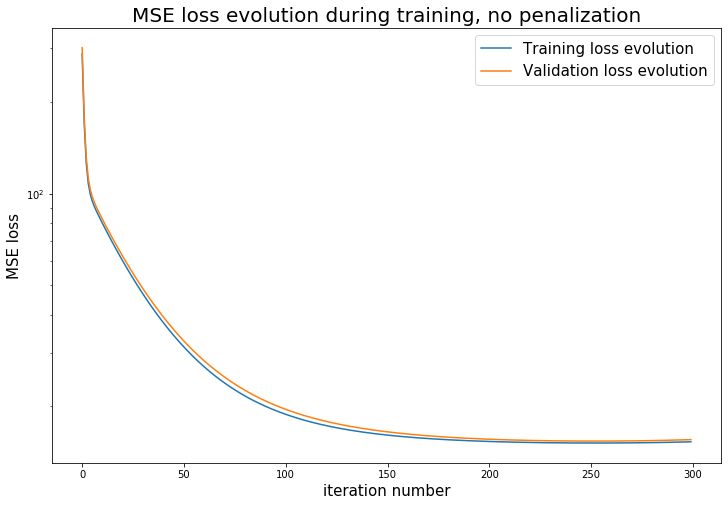

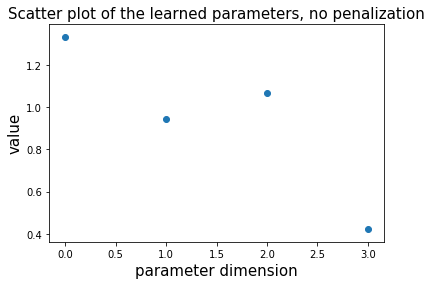

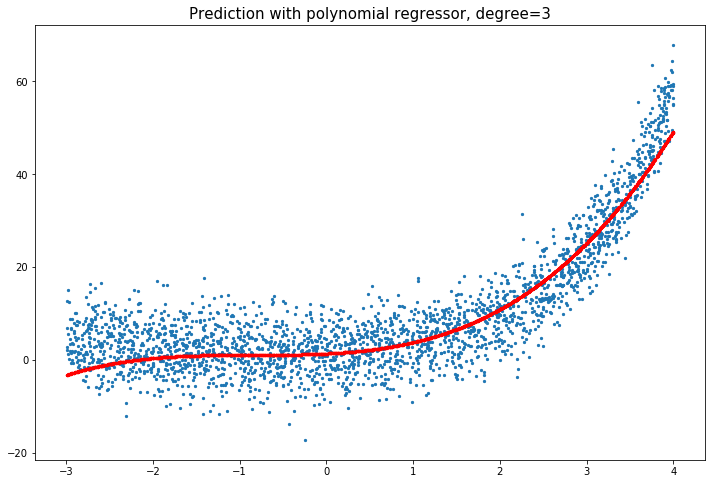

In [15]:
polynomial_regressor.plot_loss_history()
polynomial_regressor.plot_parameters()
polynomial_regressor.plot_prediction()

## Questions:
#### - Did you succeed to fit the data using a non linear mapping transformation?
Yes, with a ppolynomial regressor, we are able to fit non-linear data. This would not have been possible with a simple linear regression which only finds a line that best fits the data. However, we need to control the degree of the polynomial based on the data in order to find which model would best fit the data. This can be done through hyperparameter optimization.

#### - Try different degrees, which one leads you to the best validation error?
After trying different degrees, 3 gives the best results, with a final MSE of 15.4. If we try to go above that we quickly run into stability issues, with a degree of 4 the model is not able to fit the data anymore even if we double the number of steps and reduce the learning rate. This is most likely due to the fact that with a high degree polynomial, the MSE is more prone to returning high values which can be difficult to optimize with gradient descent

# III - Logistic regression

## III a) - Loading the data

In [31]:
data = pd.read_csv('data/breast_cancer_classification.csv', header=None)
X, Y = data.values[:, :-1], data.values[:, -1]
Y_col = Y
Y = Y.reshape((Y.shape[0], 1))


In [44]:
print(X.shape)

(569, 30)


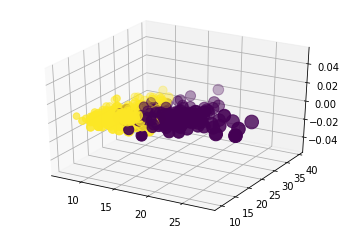

In [43]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.scatter(X[:,0],X[:,1],X[:,2],c=Y_col)

## III b) - Problem definition

Using the sigmoid function $\sigma(x)$ defined as:

$\sigma(x) = \frac{1}{1 + \exp(-x)}$

We can define our binary cross-entropy cost function $J(\theta)$ as follows:
$$
J(\mathbf{X}, \mathbf{Y}; \theta) = -\frac{1}{n} \sum_{i=1}^n Y_i \log \sigma(\mathbf{X_i}\mathbf{\theta}) + (1 - Y_i) \log (1 - \sigma(\mathbf{X_i} \mathbf{\theta})),
$$
with $\mathbf{Y} = [y_1 \cdots y_n]$, $\mathbf{X} = [\mathbf{x_1} \cdots \mathbf{x_n}]$,

$\mathbf{Y} \in \mathbb{R}^{n\times{1}}$ being the vector of labels, $\mathbf{X} \in \mathbb{R}^{n\times{p}}$ being the vector of features, $\mathbf{\theta} \in \mathbb{R}^{p\times{1}}$ being our parameters, and $n$ the number of samples.

Now we can calculate the gradient $\nabla J(\mathbf{\theta})$:
$$
\nabla_{\theta} J(\mathbf{X}, \mathbf{Y})^T = - \frac{1}{n} \sum_{i=1}^n \mathbf{X_i}(Y_i - \sigma(\mathbf{X_i}\mathbf{\theta}))
$$
$$
\nabla_{\theta} J(\mathbf{X}, \mathbf{Y}) = - \frac{1}{n} \mathbf{X}^T(\mathbf{Y} - \sigma(\mathbf{X}\theta))
$$

It leads us to the gradient descend (GD) iterative algorithm:
$$
\mathbf{\theta}_{t+1} := \mathbf{\theta}_{t} - \eta_t \nabla_{\theta} J(\mathbf{X}, \mathbf{Y})
$$

And finally, our linear prediction $\mathbf{\hat{Y}}$ can be expressed as:
$$
\mathbf{\hat{Y}} = \sigma(\mathbf{X}\mathbf{\theta})
$$
- **no $\mathbf{\hat{Y}}_i$ should reach $0$ or $1$. If it does get rounded to $0$ or $1$, prevent that from happening by adding or removing EPSILON to $\mathbf{\hat{Y}}_i$**

In [17]:
a = np.array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0])
b = np.array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0])
(a == b).mean()

0.8

In [51]:
# Logistic Regression being a GLM, we can make an inheritance from the LinearRegressor class
class LogisticRegressor(LinearRegressor):
    def __init__(self, X, Y, penalization=None,normalize= True):
        super(LogisticRegressor, self).__init__(X, Y, penalization)
        if normalize:
            self.X_tr, self.X_val = self.normalize(self.X_tr), self.normalize(self.X_val)

    
    # Return a normalized matrix with standardized features 0 mean 1 std
    def normalize(self, X):
        # TODO: (done)
        # Compute mean
        mean = np.mean(X)
        
        # Compute std
        std = np.std(X)
        
        # Normalize X
        X = (X - mean) / std
        
        return X
    
    # Return the model's accuracy on the validation dataset
    def accuracy_on_validation(self):
        # TODO: (done)
        Y_hat = self.predict(self.X_val)
        # Round to 0 or 1
        Y_hat = np.where(Y_hat > 0.5, 1, 0)
        acc = (Y_hat == self.Y_val).mean()
        return acc
        
    # Sigmoid function
    def sigmoid(self, X):
        # TODO: (done)
        return 1 / (1 + np.exp(-X))

    def predict(self, X, apply_normalization=False):
        if apply_normalization:
            X = self.normalize(X)
        return self.sigmoid(X.dot(self.theta))

    def compute_grad(self, X, Y, loss='CE'):
        """Binary cross-entropy gradient"""
        assert(X.shape[0] == Y.shape[0])
        n = X.shape[0]
        if loss == 'CE':
            # TODO: (done)
            grad = -np.dot(X.T, Y - self.predict(X)) / n
            if self.penalization == 'l2':
                # TODO: (done)
                grad += 2 * self.gamma * self.theta
            if self.penalization == 'l1':
                # TODO: (done)
                grad += self.gamma * np.sign(self.theta)
        else:
            raise NotImplementedError
        return grad

    def step_gradient_descent(self, step, X, Y):
        self.grad_theta = self.compute_grad(X, Y, loss='CE')
        # TODO: (done)
        self.theta -= step * self.grad_theta
    
    # Must return the given loss, penalized or not, for Y_true and Y_pred as inputs
    def loss(self, Y_true, Y_pred, loss='CE'):
        """Binary cross-entropy loss"""
        assert(Y_true.shape[0] == Y_pred.shape[0])
        n = Y_true.shape[0]
        if loss == 'CE':
            # TODO: (done)
            loss = -np.sum(Y_true * np.log(Y_pred) + (1 - Y_true) * np.log(1 - Y_pred)) / n
            if self.penalization == 'l2':
                # TODO: (done)
                loss += self.gamma * np.sum(self.theta ** 2)
            elif self.penalization == 'l1':
                # TODO: (done)
                loss += self.gamma * np.sum(np.abs(self.theta))
            # Clip loss in [eps, 1 - eps] to prevent values to be 0 or 1
            loss = np.clip(loss, EPSILON, 1 - EPSILON)
        else:
            raise NotImplementedError
        return loss

In [49]:
logistic_regressor = LogisticRegressor(X, Y)
logistic_regressor_no_norm = LogisticRegressor(X, Y,normalize=False)


logistic_regressor.fit(max_iterations=1000, initial_step=1e-1, step_decay=False)
logistic_regressor_no_norm.fit(max_iterations=1000, initial_step=1e-1, step_decay=False)


iteration number: 1	 training loss: 0.9968	 validation loss: 0.9626
iteration number: 2	 training loss: 0.8932	 validation loss: 0.8687
iteration number: 3	 training loss: 0.8633	 validation loss: 0.8432
iteration number: 4	 training loss: 0.8486	 validation loss: 0.8300
iteration number: 5	 training loss: 0.8363	 validation loss: 0.8182
iteration number: 6	 training loss: 0.8245	 validation loss: 0.8066
iteration number: 7	 training loss: 0.8130	 validation loss: 0.7952
iteration number: 8	 training loss: 0.8019	 validation loss: 0.7840
iteration number: 9	 training loss: 0.7910	 validation loss: 0.7731
iteration number: 10	 training loss: 0.7804	 validation loss: 0.7625
iteration number: 11	 training loss: 0.7700	 validation loss: 0.7522
iteration number: 12	 training loss: 0.7600	 validation loss: 0.7421
iteration number: 13	 training loss: 0.7501	 validation loss: 0.7323
iteration number: 14	 training loss: 0.7406	 validation loss: 0.7227
iteration number: 15	 training loss: 0.7312

iteration number: 165	 training loss: 0.3292	 validation loss: 0.3256
iteration number: 166	 training loss: 0.3285	 validation loss: 0.3249
iteration number: 167	 training loss: 0.3278	 validation loss: 0.3243
iteration number: 168	 training loss: 0.3271	 validation loss: 0.3236
iteration number: 169	 training loss: 0.3265	 validation loss: 0.3230
iteration number: 170	 training loss: 0.3258	 validation loss: 0.3223
iteration number: 171	 training loss: 0.3251	 validation loss: 0.3217
iteration number: 172	 training loss: 0.3245	 validation loss: 0.3210
iteration number: 173	 training loss: 0.3239	 validation loss: 0.3204
iteration number: 174	 training loss: 0.3232	 validation loss: 0.3198
iteration number: 175	 training loss: 0.3226	 validation loss: 0.3192
iteration number: 176	 training loss: 0.3220	 validation loss: 0.3186
iteration number: 177	 training loss: 0.3214	 validation loss: 0.3180
iteration number: 178	 training loss: 0.3207	 validation loss: 0.3174
iteration number: 17

iteration number: 346	 training loss: 0.2624	 validation loss: 0.2604
iteration number: 347	 training loss: 0.2622	 validation loss: 0.2602
iteration number: 348	 training loss: 0.2620	 validation loss: 0.2600
iteration number: 349	 training loss: 0.2618	 validation loss: 0.2598
iteration number: 350	 training loss: 0.2616	 validation loss: 0.2596
iteration number: 351	 training loss: 0.2615	 validation loss: 0.2594
iteration number: 352	 training loss: 0.2613	 validation loss: 0.2592
iteration number: 353	 training loss: 0.2611	 validation loss: 0.2590
iteration number: 354	 training loss: 0.2609	 validation loss: 0.2588
iteration number: 355	 training loss: 0.2607	 validation loss: 0.2586
iteration number: 356	 training loss: 0.2605	 validation loss: 0.2584
iteration number: 357	 training loss: 0.2603	 validation loss: 0.2582
iteration number: 358	 training loss: 0.2601	 validation loss: 0.2581
iteration number: 359	 training loss: 0.2599	 validation loss: 0.2579
iteration number: 36

iteration number: 551	 training loss: 0.2344	 validation loss: 0.2333
iteration number: 552	 training loss: 0.2343	 validation loss: 0.2332
iteration number: 553	 training loss: 0.2342	 validation loss: 0.2331
iteration number: 554	 training loss: 0.2341	 validation loss: 0.2330
iteration number: 555	 training loss: 0.2340	 validation loss: 0.2329
iteration number: 556	 training loss: 0.2339	 validation loss: 0.2329
iteration number: 557	 training loss: 0.2339	 validation loss: 0.2328
iteration number: 558	 training loss: 0.2338	 validation loss: 0.2327
iteration number: 559	 training loss: 0.2337	 validation loss: 0.2326
iteration number: 560	 training loss: 0.2336	 validation loss: 0.2325
iteration number: 561	 training loss: 0.2335	 validation loss: 0.2324
iteration number: 562	 training loss: 0.2334	 validation loss: 0.2323
iteration number: 563	 training loss: 0.2333	 validation loss: 0.2322
iteration number: 564	 training loss: 0.2332	 validation loss: 0.2322
iteration number: 56

iteration number: 708	 training loss: 0.2225	 validation loss: 0.2220
iteration number: 709	 training loss: 0.2224	 validation loss: 0.2219
iteration number: 710	 training loss: 0.2224	 validation loss: 0.2219
iteration number: 711	 training loss: 0.2223	 validation loss: 0.2218
iteration number: 712	 training loss: 0.2222	 validation loss: 0.2217
iteration number: 713	 training loss: 0.2222	 validation loss: 0.2217
iteration number: 714	 training loss: 0.2221	 validation loss: 0.2216
iteration number: 715	 training loss: 0.2221	 validation loss: 0.2216
iteration number: 716	 training loss: 0.2220	 validation loss: 0.2215
iteration number: 717	 training loss: 0.2219	 validation loss: 0.2214
iteration number: 718	 training loss: 0.2219	 validation loss: 0.2214
iteration number: 719	 training loss: 0.2218	 validation loss: 0.2213
iteration number: 720	 training loss: 0.2218	 validation loss: 0.2213
iteration number: 721	 training loss: 0.2217	 validation loss: 0.2212
iteration number: 72

iteration number: 891	 training loss: 0.2132	 validation loss: 0.2132
iteration number: 892	 training loss: 0.2131	 validation loss: 0.2131
iteration number: 893	 training loss: 0.2131	 validation loss: 0.2131
iteration number: 894	 training loss: 0.2130	 validation loss: 0.2130
iteration number: 895	 training loss: 0.2130	 validation loss: 0.2130
iteration number: 896	 training loss: 0.2129	 validation loss: 0.2130
iteration number: 897	 training loss: 0.2129	 validation loss: 0.2129
iteration number: 898	 training loss: 0.2129	 validation loss: 0.2129
iteration number: 899	 training loss: 0.2128	 validation loss: 0.2128
iteration number: 900	 training loss: 0.2128	 validation loss: 0.2128
iteration number: 901	 training loss: 0.2127	 validation loss: 0.2128
iteration number: 902	 training loss: 0.2127	 validation loss: 0.2127
iteration number: 903	 training loss: 0.2127	 validation loss: 0.2127
iteration number: 904	 training loss: 0.2126	 validation loss: 0.2126
iteration number: 90

iteration number: 37	 training loss: nan	 validation loss: nan
iteration number: 38	 training loss: nan	 validation loss: nan
iteration number: 39	 training loss: nan	 validation loss: nan
iteration number: 40	 training loss: nan	 validation loss: nan
iteration number: 41	 training loss: nan	 validation loss: nan
iteration number: 42	 training loss: nan	 validation loss: nan
iteration number: 43	 training loss: nan	 validation loss: nan
iteration number: 44	 training loss: nan	 validation loss: nan
iteration number: 45	 training loss: nan	 validation loss: nan
iteration number: 46	 training loss: nan	 validation loss: nan
iteration number: 47	 training loss: nan	 validation loss: nan
iteration number: 48	 training loss: nan	 validation loss: nan
iteration number: 49	 training loss: nan	 validation loss: nan
iteration number: 50	 training loss: nan	 validation loss: nan
iteration number: 51	 training loss: nan	 validation loss: nan
iteration number: 52	 training loss: nan	 validation lo

/home/antoine/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp
/home/antoine/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/home/antoine/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in multiply


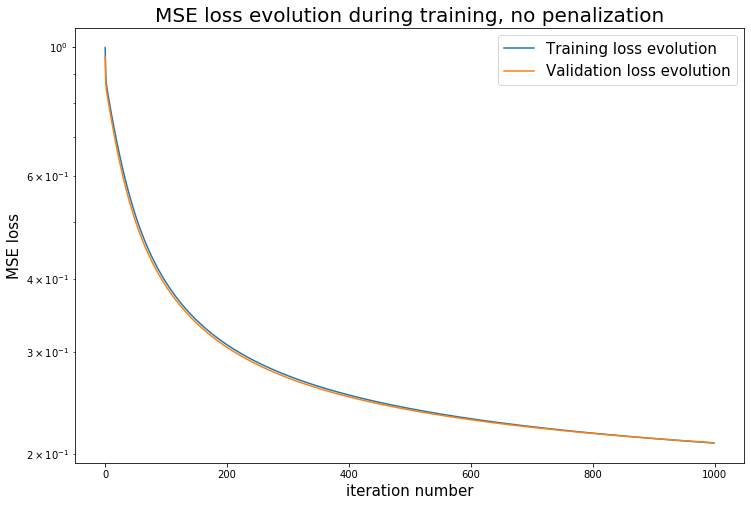

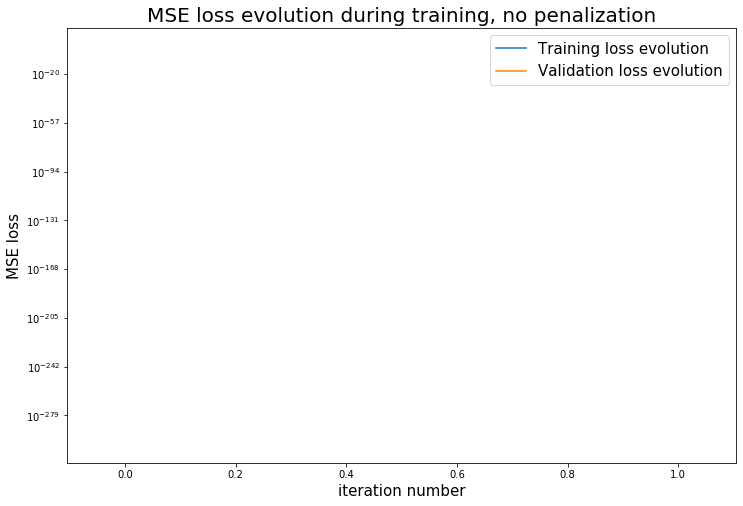

In [50]:
logistic_regressor.plot_loss_history()

logistic_regressor_no_norm.plot_loss_history()



In [52]:
print(logistic_regressor.accuracy_on_validation())



0.9300699300699301


## Questions:
#### - Describe your normalization strategy and why it is important
There are a few different ways to normalize data. Normalization and stadardization can often be used interchangeably but can take on multiple meanings. In a general term and in statistics, standardizing data allows you to compare different data easily.
In our case we went with a normalization strategy by subtracting the data by its mean and dividing it by its variance. This gives us data with a mean of 0 and with unit variance which are characteristics of the __normal__ law hence the term __normalization__. This step is important in most machine learning and deep learning scenarios as it makes the training of a model __more stable and faster__. We could technically leave the data as is but the model could have a hard time tuning its parameters to the required value and would be much more unstable because our error could be a lot bigger depending on our loss function (this is more common with regression though). Other normalization strategies include scaling the data around the min and max to get a range of values between 0 and 1.

#### - Why do we need a different loss function for a classification problem (why not MSE again?)
MSE computes error between real values acting like a sort of distance. Because here the problem that we are trying to solve is different, we must use a different loss function to reflect the task that we want our model to learn. In our case we care about making a binary prediction so our prediction should either be close to 0 or to 1. MSE just needs to get close to the data point and find the curve that __best fits__ the data but here we are trying to find a decision boundary that __best separates__ the data. This is why we use a different loss between a regression task and a classification task

#### - Why is the normalization particulary relevant in this case? Compare the performances with and without it. Comment.

without data normalization we are not even able to train. When we visualize the data we can see that it has a total of 30 dimensions and the range of the values that it takes can be very large at times. These sort of high values will require that the model weights be very high which can be difficult to obtain during training. Like we mentioned before, normalization makes our data centered around zero and having a standard deviation of 1. It turns out that in machine learning, data that is normaly distributed is particularly easy to model.